# PCA Nenya

In [1]:
# imports
from importlib import reload
import sys
import h5py
import os
import numpy as np
from scipy import stats

import pandas
import seaborn as sns
from matplotlib import pyplot as plt

#
from ulmo import io as ulmo_io
from ulmo.plotting import plotting

sys.path.append('../')
import scattering

from sklearn import decomposition

use torch backend


# Load

In [2]:
latents_2009_file = os.path.join(
    os.getenv('OS_SST'),  'MODIS_L2', 'Nenya', 'latents', 'MODIS_R2019_v4_REDO',  
    'SimCLR_resnet50_lr_0.05_decay_0.0001_bsz_256_temp_0.07_trial_5_cosine_warm',
    'MODIS_R2019_2009_95clear_128x128_latents_std.h5')

In [3]:
f = h5py.File(latents_2009_file, 'r')

In [5]:
f['valid'].shape

(757592, 256)

In [6]:
latents = f['valid'][:]

# PCA me

## Mean

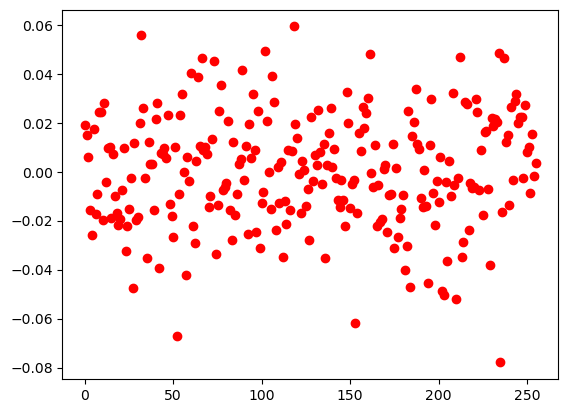

In [9]:
mean_l = np.mean(latents, axis=0)
plt.clf()
ax = plt.gca()
ax.plot(mean_l, 'or')
plt.show()

## Fit

In [10]:
pca_fit = decomposition.PCA(n_components=latents.shape[1]).fit(latents)

## Variance

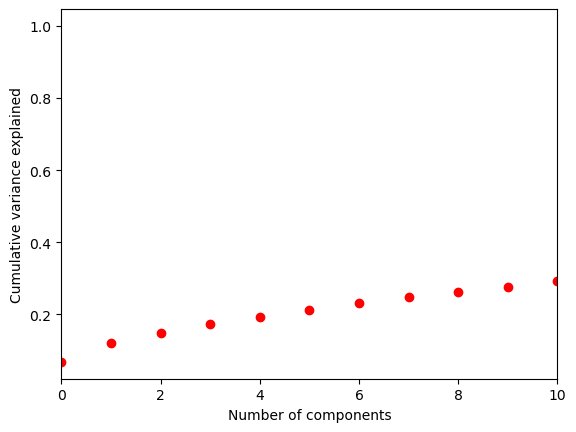

In [11]:
plt.clf()
ax = plt.gca()
ax.plot(np.cumsum(pca_fit.explained_variance_ratio_), 'o', color='r')
# Label
ax.set_ylabel('Cumulative variance explained')
ax.set_xlabel('Number of components')
#
ax.set_xlim(0,10.)
#
plt.show()